# Assignment 2
## Feb. 20, 2024

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)

## Set `np` seed

In [2]:
np.random.seed(1234)

In [3]:
def gen_data(n: int):
    """
    Generating function for multivariate normal for a given n
    """
    p = 3
    n1 = int(n/2)
    n2 = int(n/2)
    cov_1 = np.diag(np.repeat(1, p)) + 0.2
    cov_2 = np.diag(np.repeat(1, p)) + 0.2
    cov2_cov_tmp = cov_2[1,2]
    cov_2[1,2] = cov2_cov_tmp + 0.5
    cov_2[2,1] = cov2_cov_tmp + 0.5

    x_class_1 = np.random.multivariate_normal(size = n1,
                                              mean = np.repeat(3, p),
                                              cov = cov_1)
    x_class_2 = np.random.multivariate_normal(size = n2,
                                              mean = np.repeat(2, p),
                                              cov = cov_2)
    
    x = np.concatenate([x_class_1, x_class_2])
    y = np.repeat([1, 2], [n1, n2])

    x_col_names = ["x%s" % x_enum for x_enum in range(1, p + 1)]
    df = pd.DataFrame(x,
                      columns = x_col_names)
    df['y'] = y

    return df


#### Generate training size of $n=50$ and test size of $n = 10000$

In [4]:
training_set_1  = gen_data(n = 50)
training_set_2 = gen_data(n = 10000)
testing_set = gen_data(n = 10000)

#### Q1
- We would expect LDA to perform better when trained on the small training set. QDA would attempt to overfit against the potentially unrepresentative small training set in order to reduce bias, and this increased variance would significantly reduce its performance once evaluated against a significantly larger testing set. 
- Conversely, we would expect QDA to perform better with a large training set, as the additional training data would help to reduce model variance

#### Q2

In [5]:
small_set_model_lda_accuracies = []
large_set_model_lda_accuracies = []
small_set_model_qda_accuracies = []
large_set_model_qda_accuracies = []

n_iter = 500

for _ in range(0, n_iter):
        training_set_1  = gen_data(n = 50)
        training_set_2 = gen_data(n = 10000)
        testing_set = gen_data(n = 10000)

        lda = LinearDiscriminantAnalysis()
        lda.fit(X = training_set_1.iloc[:, 0:3],
                y = training_set_1.iloc[:, -1])
        small_set_lda_accuracy = lda.score(X = testing_set.iloc[:, 0:3],
                                           y = testing_set.iloc[:, -1])
        
        small_set_model_lda_accuracies.append(small_set_lda_accuracy)

        lda = LinearDiscriminantAnalysis()
        lda.fit(X = training_set_2.iloc[:, 0:3],
                y = training_set_2.iloc[:, -1])
        large_set_lda_accuracy = lda.score(X = testing_set.iloc[:, 0:3],
                                           y = testing_set.iloc[:, -1])
        
        large_set_model_lda_accuracies.append(large_set_lda_accuracy)

        qda = QuadraticDiscriminantAnalysis()
        qda.fit(X = training_set_1.iloc[:, 0:3],
                y = training_set_1.iloc[:, -1])
        small_set_qda_accuracy = qda.score(X = testing_set.iloc[:, 0:3],
                                           y = testing_set.iloc[:, -1])
        
        small_set_model_qda_accuracies.append(small_set_qda_accuracy)

        qda = QuadraticDiscriminantAnalysis()
        qda.fit(X = training_set_2.iloc[:, 0:3],
                y = training_set_2.iloc[:, -1])
        large_set_qda_accuracy = qda.score(X = testing_set.iloc[:, 0:3],
                                           y = testing_set.iloc[:, -1])
        
        large_set_model_qda_accuracies.append(large_set_qda_accuracy)


small_set_lda_mean_accuracy = np.mean(small_set_model_lda_accuracies)
large_set_lda_mean_accuracy = np.mean(large_set_model_lda_accuracies)
small_set_qda_mean_accuracy = np.mean(small_set_model_qda_accuracies)
large_set_qda_mean_accuracy = np.mean(large_set_model_qda_accuracies)

accuracy_data = [[small_set_lda_mean_accuracy, large_set_lda_mean_accuracy],
                 [small_set_qda_mean_accuracy, large_set_qda_mean_accuracy]]

accuracies = pd.DataFrame(data = accuracy_data,
                          columns = ['Small Training Set', 'Large Training Set'],
                          index = ['LDA', 'QDA'])

accuracies

,Small Training Set,Large Training Set
LDA,0.6701,0.7365
QDA,0.6790,0.7550


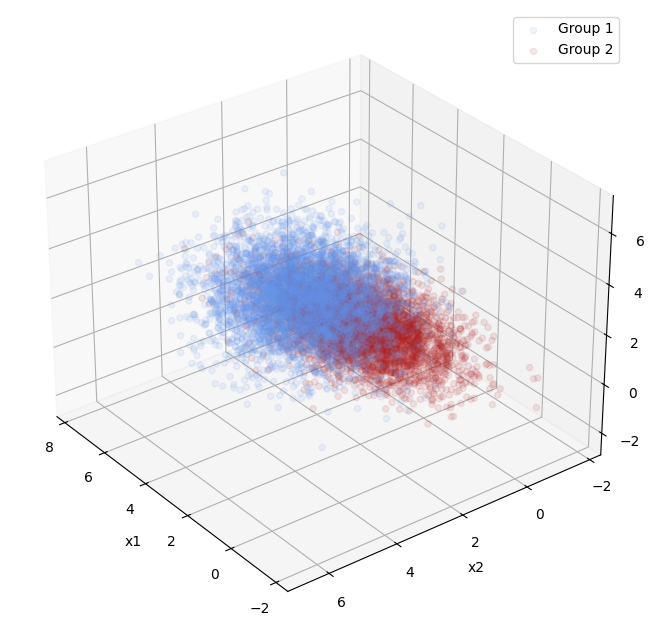

In [6]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
group1_testing = testing_set.loc[testing_set['y'] == 1]
group2_testing = testing_set.loc[testing_set['y'] == 2]
ax.scatter(group1_testing.iloc[:, 0],
            group1_testing.iloc[:, 1],
            group1_testing.iloc[:, 2],
            color = 'cornflowerblue',
            label = "Group 1",
            alpha = 0.1)
ax.scatter(group2_testing.iloc[:, 0],
            group2_testing.iloc[:, 1],
            group2_testing.iloc[:, 2],
            color = 'firebrick',
            label = "Group 2",
            alpha = 0.1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.legend()
ax.view_init(30, 142.5)

- This is in line with expectations, as a model trained on a large training set has less error than the same model trained against a small training set. The reduction in variance significantly improves the accuracy of classifications
- What is surprising is that the difference between LDA and QDA is not very large. It is expectedly larger in difference for a large training set, as QDA benefits from more training data, but the gap is still quite small. A possible explanation is that the true discriminant function is more similar to being a linear function than a quadratic, so the marginal improvement in performance of using a higher degree polynomial is negligible